In [35]:
from xml.sax.handler import feature_namespaces

# 데이터 저장
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [36]:
df = pd.read_excel('data/사과배복숭아-학습.xlsx')
df

,fruit,weight,height,width,hardness,sweet,sour,color
0,복숭아,310.7,76.2,86.3,45.2,12.7,0.35,60.8
1,복숭아,265.9,74.5,81.8,29.5,14.2,0.24,61.0
2,복숭아,407.5,82.6,90.1,34.1,14.3,0.29,68.2
3,복숭아,314.6,74.5,86.1,22.1,14.9,0.28,62.1
4,복숭아,310.7,77.5,85.7,31.1,13.0,0.40,64.6
...,...,...,...,...,...,...,...,...
163,사과,221.3,73.2,80.0,55.8,10.5,0.31,43.6
164,사과,252.2,71.3,84.3,34.5,13.4,0.40,42.6
165,사과,284.3,78.2,88.0,36.2,13.6,0.36,44.8
166,사과,314.3,77.3,91.1,34.1,12.9,0.35,45.7


In [37]:
# 모든 결측치 값을 0으로 대체
df.fillna(0, inplace = True)
df.isna().sum()

fruit       0
weight      0
height      0
width       0
hardness    0
sweet       0
sour        0
color       0
dtype: int64

In [38]:
# fruit Column 의 항목값 별 개수
df['fruit'].value_counts()

fruit
사과     77
배      49
복숭아    42
Name: count, dtype: int64

In [39]:
# 사과 0, 배 1, 복숭아 2
df.replace({'fruit' : {'사과' : 0, '배' : 1, '복숭아' : 2}}, inplace=True)
df

C:\Users\KH302\AppData\Local\Temp\ipykernel_2780\94814841.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'fruit' : {'사과' : 0, '배' : 1, '복숭아' : 2}}, inplace=True)


,fruit,weight,height,width,hardness,sweet,sour,color
0,2,310.7,76.2,86.3,45.2,12.7,0.35,60.8
1,2,265.9,74.5,81.8,29.5,14.2,0.24,61.0
2,2,407.5,82.6,90.1,34.1,14.3,0.29,68.2
3,2,314.6,74.5,86.1,22.1,14.9,0.28,62.1
4,2,310.7,77.5,85.7,31.1,13.0,0.40,64.6
...,...,...,...,...,...,...,...,...
163,0,221.3,73.2,80.0,55.8,10.5,0.31,43.6
164,0,252.2,71.3,84.3,34.5,13.4,0.40,42.6
165,0,284.3,78.2,88.0,36.2,13.6,0.36,44.8
166,0,314.3,77.3,91.1,34.1,12.9,0.35,45.7


In [40]:
# 차트를 그리기 위한 통계 데이터
df.groupby('fruit').mean()  # mean() : 평균값

,weight,height,width,hardness,sweet,sour,color
fruit,,,,,,,
0,291.206494,78.167532,87.055844,43.549351,13.903896,0.310000,52.781818
1,617.228571,96.612245,93.832653,33.234694,12.300000,0.208163,0.000000
2,340.166667,79.159524,88.573810,34.238095,12.466667,0.313810,63.019048


<Axes: xlabel='weight', ylabel='height'>

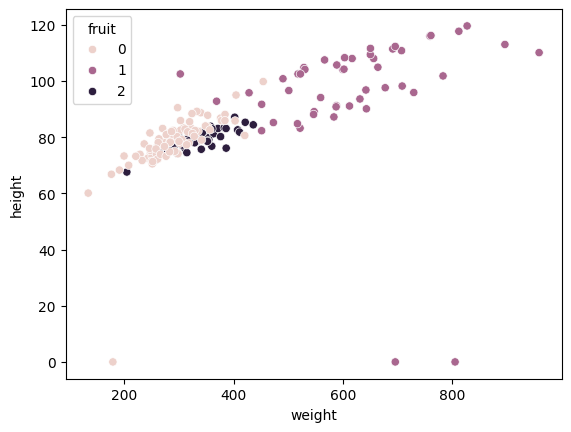

In [41]:
sns.scatterplot(data = df, x = 'weight', y = 'height', hue = 'fruit')

<Axes: xlabel='sweet', ylabel='sour'>

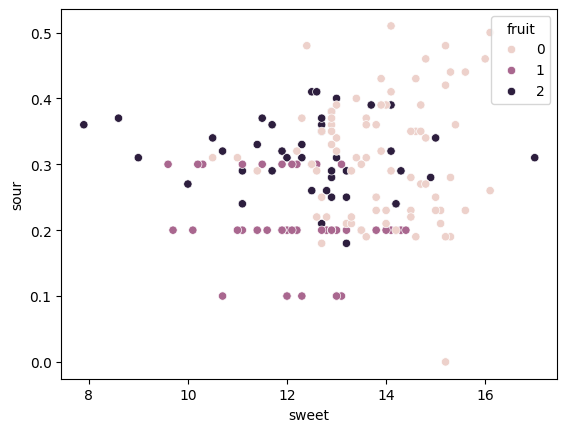

In [42]:
sns.scatterplot(data = df, x = 'sweet', y = 'sour', hue = 'fruit')

In [43]:
# 모델 생성 및 학습
#학습용 데이터
x_train = df.iloc[:, 1 :]   # 모든행의 1열부터 끝까지 : 학습 데이터
y_train = df.iloc[:, 0]     # 모든행의 0열(Fruit)만 : 정답 데이터

model = DecisionTreeClassifier()  # 의사 결정 트리
model.fit(x_train, y_train)

# 분류 테스트
feature_names = ['weight', 'height', 'width', 'hardness', 'sweet', 'sour', 'color']
new_fruit = pd.DataFrame([[270.0, 75.0, 85.0, 37.0, 13.5, 0.22, 55.0]], columns = feature_names)

# 생성된 모델을 사용해서 결과값 예측
# new_fruit 데이터 전달해서 맞게 나오는지 테스트
prd = model.predict(new_fruit)
prd ## array : 0, 0은 사과

array([0])

In [44]:
#모델 평가
## 테스트용 데이터 읽어오기
df_test = pd.read_excel('data/사과배복숭아-테스트.xlsx')
df_test.fillna(0, inplace = True)

mapping = {'사과' : 0, '배' : 1, '복숭아' : 2}
df_test['fruit'] = df_test['fruit'].map(mapping)

df_test

,fruit,weight,height,width,hardness,sweet,sour,color
0,2,400.5,82.6,90.1,32.1,15.3,0.29,68.2
1,2,310.6,73.5,80.1,20.1,15.0,0.28,62.1
2,2,340.0,75.0,86.7,20.5,14.1,0.32,58.4
3,2,330.0,78.8,85.0,41.5,13.0,0.31,58.6
4,1,680.0,100.0,111.6,36.8,12.0,0.10,0.0
5,1,640.0,99.0,96.3,30.1,12.0,0.20,0.0
6,1,599.6,104.1,86.7,31.5,10.1,0.20,0.0
7,0,319.0,87.0,89.2,57.7,13.3,0.21,56.1
8,0,350.0,89.0,91.8,35.0,13.6,0.31,57.8
9,0,270.0,75.0,85.0,37.0,13.3,0.22,55.6


In [45]:
x_test = df_test.iloc[:, 1 :]   # 학습 데이터
y_test = df_test.iloc[:, 0]     # 정답 데이터

# model.fit(x_test, y_test)
tr_prd = model.predict(x_test)
tr_prd

array([0, 2, 2, 2, 1, 1, 1, 0, 0, 0])

In [49]:
# 평가하기
## 예측값과 테스트 데이터의 정답 비교, 정확도 계산
accuracy_score(y_test, tr_prd)

print('정확도 = ', accuracy_score(y_test, tr_prd))

for i in range(len(y_test)) :
    print('예측 : ', tr_prd[i], ', 정답 : ', y_test.iloc[i])

정확도 =  0.9
예측 :  0 , 정답 :  2
예측 :  2 , 정답 :  2
예측 :  2 , 정답 :  2
예측 :  2 , 정답 :  2
예측 :  1 , 정답 :  1
예측 :  1 , 정답 :  1
예측 :  1 , 정답 :  1
예측 :  0 , 정답 :  0
예측 :  0 , 정답 :  0
예측 :  0 , 정답 :  0
